# Analyses of multiple large populations

In [1]:
import pickle
import gzip
import numpy as np
import pandas as pd
from scipy import stats

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [3]:
%%time

# SELECTION = 0.01 POPULAITONS
prefix = '../../Simulations/Ensemble-simulations/saved_simulations/large-selection_0p01-1000_MultiSim/'
selection_0p01 = []

for i in tqdm(range(1000)):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    selection_0p01.append(data)
print(len(selection_0p01))
print(type(selection_0p01[0]))

100%|██████████| 1000/1000 [03:33<00:00,  4.68it/s]

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 2min 1s, sys: 1min 1s, total: 3min 3s
Wall time: 3min 33s


## Maximum allele frequencies

In [4]:
%%time
selection_0p01_MaxAFs = get_max_AFs(selection_0p01, det_lim=100)

CPU times: user 3.48 s, sys: 8.82 s, total: 12.3 s
Wall time: 45.4 s


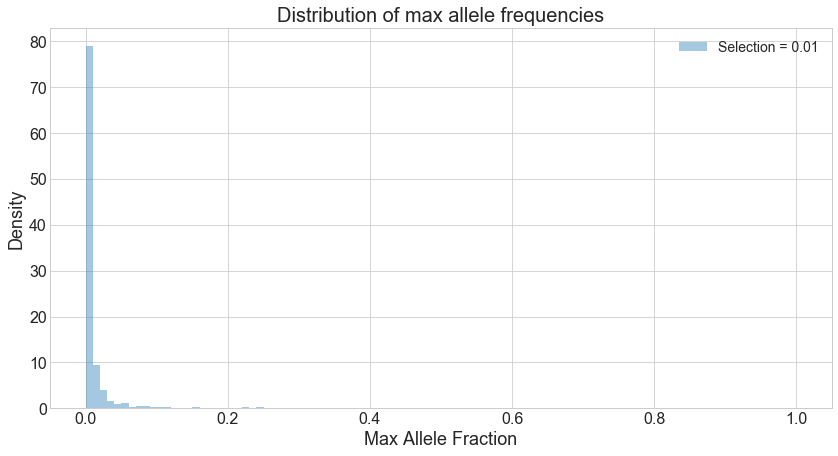

In [5]:
sns.distplot(selection_0p01_MaxAFs, bins=100, norm_hist=True, kde=False, label="Selection = 0.01");
plt.title('Distribution of max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p01-MaxAFs.png')
plt.show()

## Heterogeneity

In [6]:
%%time
selection_0p01_H = get_heterogeneity(selection_0p01, det_lim=100)

CPU times: user 2.9 s, sys: 5.1 s, total: 8 s
Wall time: 16.7 s


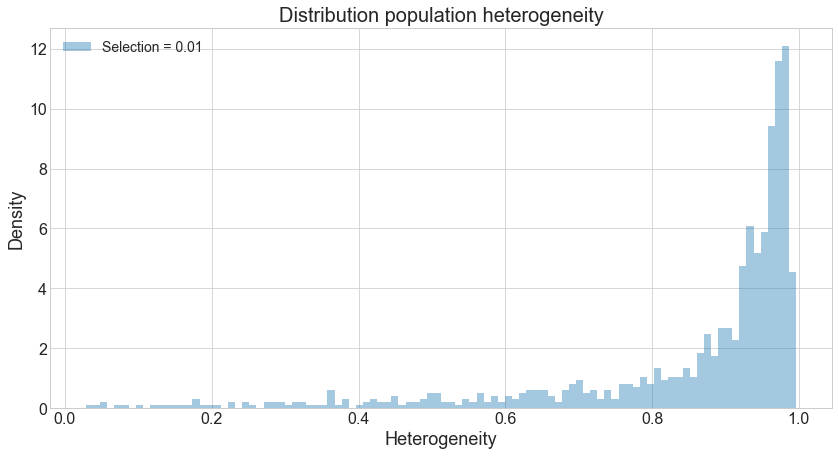

In [7]:
sns.distplot(selection_0p01_H, bins=100, norm_hist=True, kde=False, label="Selection = 0.01");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p01-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [8]:
%%time
selection_0p01_mut_distr = get_mutation_distributions(selection_0p01, det_lim=100)

CPU times: user 1min 8s, sys: 3.21 s, total: 1min 11s
Wall time: 1min 18s


In [9]:
selection_0p01_mut_distr.to_csv('../Analysis-Data/Large-1000_sim-selection_0p01_mut_distr.csv')

In [10]:
selection_0p01_avg_nmd = selection_0p01_mut_distr.mean()
selection_0p01_std_nmd = selection_0p01_mut_distr.std()

In [11]:
%%time
selection_0p01_avg_num_mut = avg_num_mutations(selection_0p01_avg_nmd)

CPU times: user 894 µs, sys: 488 µs, total: 1.38 ms
Wall time: 2.06 ms


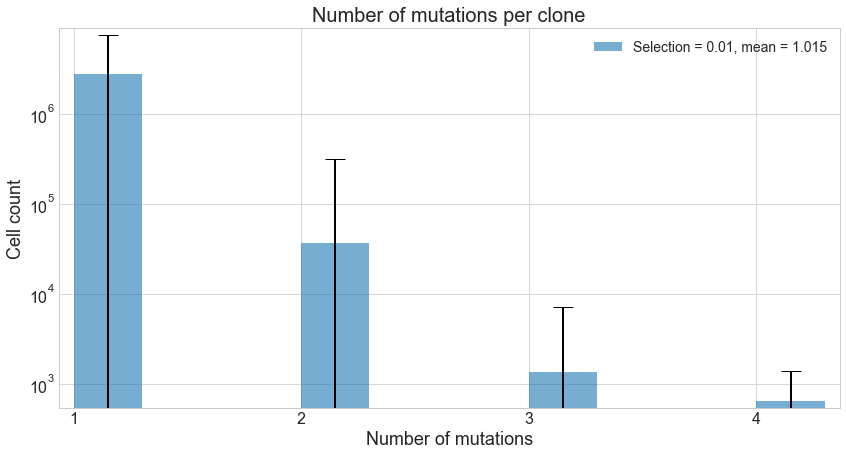

In [12]:
selection_0p01_errors = selection_0p01_std_nmd.values

plt.bar(left=selection_0p01_avg_nmd.index+0.15, height=selection_0p01_avg_nmd.values, width=0.3, alpha=0.6, 
        align='center', yerr=selection_0p01_errors, capsize=10, 
        label="Selection = 0.01, mean = %s" %(round(selection_0p01_avg_num_mut, 3)));

plt.title("Number of mutations per clone");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(selection_0p01_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p01-Num_mutations.png')
plt.show()

## Total number of mutations

In [13]:
%%time
selection_0p01_total_m = get_total_mutations(selection_0p01, det_lim=1)

CPU times: user 12.5 s, sys: 42.3 s, total: 54.8 s
Wall time: 2min 40s


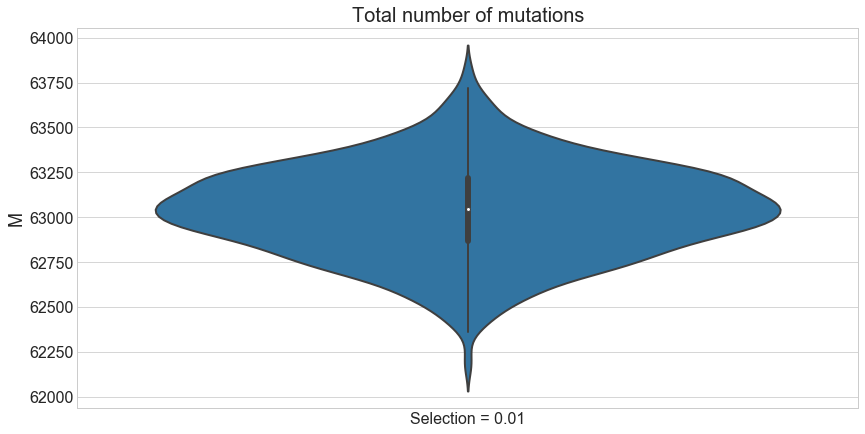

In [14]:
sns.violinplot(data=[selection_0p01_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0], ["Selection = 0.01"]);
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p01-Total_num_mutations.png')
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [15]:
alpha = 0.3

In [16]:
%%time
selection_0p01_rec_errors = get_reconstruction_errors(selection_0p01, alpha, det_lim=100)

CPU times: user 2min 17s, sys: 8.65 s, total: 2min 26s
Wall time: 2min 56s


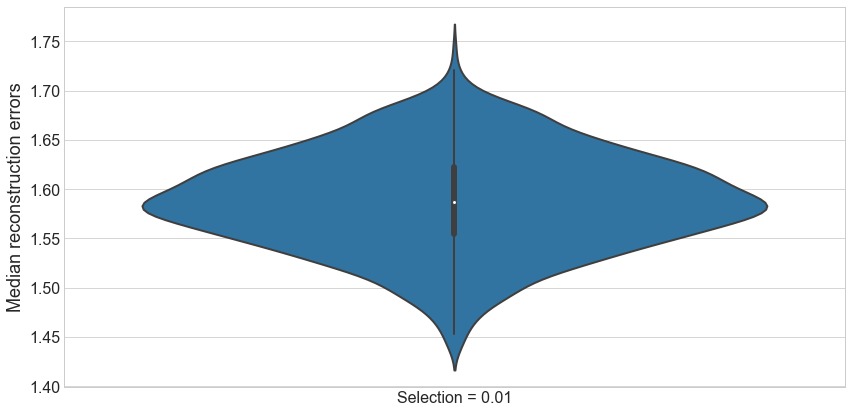

In [17]:
sns.violinplot(data=[selection_0p01_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0], ["Selection = 0.01"]);
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_0p01-Rec_errors.png')
plt.show()

## Export data

In [18]:
d = pd.DataFrame()
d["selection_0p01_MaxAFs"] = selection_0p01_MaxAFs
d["selection_0p01_H"] = selection_0p01_H
d["selection_0p01_total_m"] = selection_0p01_total_m
d["selection_0p01_rec_errors"] = selection_0p01_rec_errors

d.to_csv('../Analysis-Data/Large-selection_0p01-1000_sim-Analyzed_data.csv')